In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

## Importing Data from Flat Files

Import FlatFile

In [ ]:
df = pd.read_csv('sample.csv')
df2 = pd.read_csv('sample.tsv', sep='\t')

Limiting rows and Cols imported

In [2]:
#Limit Cols
cols = ['zipcode', 'agi_stub', 'mars1', 'MARS2', 'NUMDEP']
vt_data = pd.read_csv("Datasets/vt_tax_data_2016.csv",
            usecols=cols)

print(vt_data.head())

# List with cols names
full_cols = ['STATEFIPS', 'STATE', 'zipcode', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'PREP', 'N2', 'NUMDEP', 'TOTAL_VITA', 'VITA', 'TCE', 'VITA_EIC', 'RAL', 'RAC', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N00200', 'A00200', 'N00300', 'A00300', 'N00600', 'A00600', 'N00650', 'A00650', 'N00700', 'A00700', 'N00900', 'A00900', 'N01000', 'A01000', 'N01400', 'A01400', 'N01700', 'A01700', 'SCHF', 'N02300', 'A02300', 'N02500', 'A02500', 'N26270', 'A26270', 'N02900', 'A02900', 'N03220', 'A03220', 'N03300', 'A03300', 'N03270', 'A03270', 'N03150', 'A03150', 'N03210', 'A03210', 'N03230', 'A03230', 'N03240', 'A03240', 'N04470', 'A04470', 'A00101', 'N17000', 'A17000', 'N18425', 'A18425', 'N18450', 'A18450', 'N18500', 'A18500', 'N18800', 'A18800', 'N18300', 'A18300', 'N19300', 'A19300', 'N19500', 'A19500', 'N19530', 'A19530', 'N19550', 'A19550', 'N19570', 'A19570', 'N19700', 'A19700', 'N20800', 'A20800', 'n21020', 'a21020', 'N04800', 'A04800', 'N05800', 'A05800', 'N09600', 'A09600', 'N05780', 'A05780', 'N07100', 'A07100', 'N07300', 'A07300', 'N07180', 'A07180', 'N07230', 'A07230', 'N07240', 'A07240', 'N07220', 'A07220', 'N07260', 'A07260', 'N09400', 'A09400', 'N85770', 'A85770', 'N85775', 'A85775', 'N09750', 'A09750', 'N10600', 'A10600', 'N59660', 'A59660', 'N59720', 'A59720', 'N11070', 'A11070', 'N10960', 'A10960', 'N11560', 'A11560', 'N06500', 'A06500', 'N10300', 'A10300', 'N85530', 'A85530', 'N85300', 'A85300', 'N11901', 'A11901', 'N11902', 'A11902']

# First 500 rows after 500 rows (500-1000)
vt_data_next500 = pd.read_csv("Datasets/vt_tax_data_2016.csv", 
                       		  nrows=500,
                       		  skiprows= 500,
                       		  header=None,
                       		  names=full_cols)
                                
print(vt_data_next500.head())

   zipcode  agi_stub  mars1  MARS2  NUMDEP
0        0         1  85090  14170   26200
1        0         2  51960  18820   32310
2        0         3  19540  22650   23610
3        0         4   5830  22190   18860
4        0         5   3900  33800   30330
   STATEFIPS STATE  zipcode  agi_stub   N1  mars1  MARS2  MARS4  PREP   N2  \
0         50    VT     5356         2  180    120     40      0    90  250   
1         50    VT     5356         3   80     50     40      0    40  150   
2         50    VT     5356         4   50      0     40      0    40  110   
3         50    VT     5356         5   80     20     50      0    60  170   
4         50    VT     5356         6    0      0      0      0     0    0   

   ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  A11901  \
0  ...     170     497       0       0       0       0      50      76   
1  ...      80     460       0       0       0       0      40     142   
2  ...      50     471       0       0       0     

Specify dtypes of DataFrame

In [4]:
data_types = {'agi_stub' : 'category',
			  'zipcode' : str}

data = pd.read_csv("Datasets/vt_tax_data_2016.csv", dtype=data_types)
data.dtypes.head()

STATEFIPS       int64
STATE          object
zipcode        object
agi_stub     category
N1              int64
dtype: object

Specify Nan values before import

In [5]:
# Zipcode 0 is None
null_values = {'zipcode' : 0}

data = pd.read_csv("Datasets/vt_tax_data_2016.csv", na_values=null_values)
data[data.zipcode.isna()]

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,50,VT,NaN,1,111580,85090,14170,10740,45360,130630,...,53660,50699,0,0,0,0,10820,9734,88260,138337
1,50,VT,NaN,2,82760,51960,18820,11310,35600,132950,...,74340,221146,0,0,0,0,12820,20029,68760,151729
2,50,VT,NaN,3,46270,19540,22650,3620,24140,91870,...,44860,266097,0,0,0,0,10810,24499,34600,90583
3,50,VT,NaN,4,30070,5830,22190,960,16060,71610,...,29580,264678,0,0,0,0,7320,21573,21300,67045
4,50,VT,NaN,5,39530,3900,33800,590,22500,103710,...,39170,731963,40,24,0,0,12500,67761,23320,103034
5,50,VT,NaN,6,9620,600,8150,0,7040,26430,...,9600,894432,3350,4939,4990,20428,3900,93123,2870,39425


Error handling 

In [ ]:
try:
  # Set warn_bad_lines to issue warnings about bad records
  data = pd.read_csv("vt_tax_data_2016_corrupt.csv", 
                     error_bad_lines=False,  # JumpLines with error
                     warn_bad_lines=True)    # Show Warning 
  
  # View first 5 records
  print(data.head())
  
except pd.errors.ParserError:
    print("Your data contained rows that could not be parsed.")

## Importing Data From Excel Files

Import Chunk of data from excel

In [7]:
# Create string of lettered columns to load
col_string = 'AD,AW:BA'

# Load data with skiprows and usecols set
survey_responses = pd.read_excel("Datasets/fcc-new-coder-survey.xlsx", 
                        usecols=col_string, 
                        skiprows=2)

print(survey_responses.columns)

Index(['ExpectedEarning', 'JobApplyWhen', 'JobPref', 'JobRelocateYesNo',
       'JobRoleInterest', 'JobWherePref'],
      dtype='object')


Specify sheet_name

In [9]:
# Sheet_name = ['2017','2016'], if sheet_name=None return All sheets
survey_responses_2017 = pd.read_excel("Datasets/fcc-new-coder-survey.xlsx", 
                        usecols=col_string, 
                        skiprows=2,
                        sheet_name='2017')

survey_responses_2017.head()

,ExpectedEarning,JobApplyWhen,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref
0,NaN,NaN,start your own business,NaN,NaN,NaN
1,35000.0,Within 7 to 12 months,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers
2,70000.0,Within 7 to 12 months,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference
3,40000.0,Within the next 6 months,work for a medium-sized company,NaN,"Front-End Web Developer, Full-Stack Web Deve...",from home
4,140000.0,Within 7 to 12 months,work for a multinational corporation,1.0,"Full-Stack Web Developer, Information Security...",in an office with other developers


TreatBooleans format

In [ ]:
survey_subset = pd.read_excel("Datasets/fcc-new-coder-survey.xlsx",
                              skiprows=2,
                              dtype={
                              "AttendedBootCampYesNo": bool},
                              true_values=['Yes'],
                              false_values=['No'])

# View the data
print(survey_subset.head())

TreatDataTime format

In [ ]:
# Load file, with Part1StartTime parsed as datetime data
survey_data = pd.read_excel("fcc_survey.xlsx",
                            parse_dates=['Part1StartTime'])

# Print first few values of Part1StartTime
print(survey_data.Part1StartTime.head())

In [ ]:
# Create dict of columns to combine into new datetime column
datetime_cols = {"Part2Start": ['Part2StartDate','Part2StartTime']}


# Load file, supplying the dict to parse_dates
survey_data = pd.read_excel("fcc_survey_dts.xlsx",
                            parse_dates=datetime_cols)

# View summary statistics about Part2Start
print(survey_data.Part2Start.describe())

Formating Datatime after data is loaded

In [ ]:
# Parse datetimes and assign result back to Part2EndTime
survey_data["Part2EndTime"] = pd.to_datetime(survey_data["Part2EndTime"], 
                                             format="%m%d%Y %H:%M:%S")

# Print first few values of Part2EndTime
print(survey_data["Part2EndTime"].head())

## Importing Data from Databases

In [25]:
# Import sqlalchemy's create_engine() function
from sqlalchemy import create_engine
from sqlalchemy import inspect

# Create the database engine
engine = create_engine('sqlite:///Datasets/data.db')
insp = inspect(engine)

# View the tables in the database
#print(engine.table_names())  Old Method
print(insp.get_table_names())

['boro_census', 'hpd311calls', 'weather']


Simple SQL Query to DF

In [29]:
# Create a SQL query to load the entire weather table
query = """
SELECT * 
FROM weather;
"""

# Load weather with the SQL query
weather = pd.read_sql(query, engine)

# View the first few rows of data
weather.head()

,station,name,latitude,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/01/2017,December,5.37,0.00,0.0,,52,42
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/02/2017,December,3.13,0.00,0.0,,48,39
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/03/2017,December,2.01,0.00,0.0,,48,42
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/04/2017,December,3.58,0.00,0.0,,51,40
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/05/2017,December,6.71,0.75,0.0,,61,50


Other Example SQL

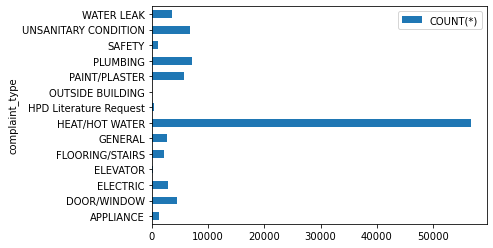

In [32]:
# Create query to get call counts by complaint_type
query = """
SELECT complaint_type, 
     COUNT(*)
  FROM hpd311calls
  GROUP BY complaint_type;
"""

# Create dataframe of call counts by issue
calls_by_issue = pd.read_sql(query, engine)

# Graph the number of calls for each housing issue
calls_by_issue.plot.barh(x="complaint_type")
plt.show()

In [33]:
# Query to get water leak calls and daily precipitation
query = """
SELECT hpd311calls.*, weather.prcp
  FROM hpd311calls
  JOIN weather
    ON hpd311calls.created_date = weather.date
  WHERE hpd311calls.complaint_type = 'WATER LEAK';"""

# Load query results into the leak_calls dataframe
leak_calls = pd.read_sql(query, engine)

# View the dataframe
print(leak_calls.head())

  unique_key created_date agency complaint_type incident_zip  \
0   38074305   01/01/2018    HPD     WATER LEAK        11212   
1   38078748   01/01/2018    HPD     WATER LEAK        10458   
2   38081097   01/01/2018    HPD     WATER LEAK        11221   
3   38077874   01/01/2018    HPD     WATER LEAK        11418   
4   38081110   01/01/2018    HPD     WATER LEAK        11420   

          incident_address community_board   borough  prcp  
0     1026 WILLMOHR STREET     17 BROOKLYN  BROOKLYN   0.0  
1       2700 MARION AVENUE        07 BRONX     BRONX   0.0  
2  192 MALCOLM X BOULEVARD     03 BROOKLYN  BROOKLYN   0.0  
3    129-11 JAMAICA AVENUE       09 QUEENS    QUEENS   0.0  
4        111-17 133 STREET       10 QUEENS    QUEENS   0.0  


## Importing JSON Data and Working with APIs

Load data from Json

In [ ]:
pop_in_shelters = pd.read_json('dhs_daily_report.json')

In [ ]:
'''
 Orient Json 
'split' : dict like {index -> [index], columns -> [columns], data -> [values]}
'records' : list like [{column -> value}, ... , {column -> value}]
'index' : dict like {index -> {column -> value}}
'columns' : dict like {column -> {index -> value}}
'values' : just the values array
'''

Pandas API Json

In [38]:
api_url = "https://api.yelp.com/v3/businesses/search"

# Get data about NYC cafes from the Yelp API
response = requests.get(api_url, 
                headers=headers, 
                params= {'term': 'cafe', 'location': 'NYC'})

data = response.json()
data

{'error': {'code': 'UNAUTHORIZED_ACCESS_TOKEN',
  'description': 'The access token provided is not currently able to query this endpoint.'}}